# **Project Name**:**Customer Purchase Behavior Analysis using Descriptive Statistics**

### **Contribution**:**Subrat Mahavoi**(Individual)


# **Github Link**
**https://github.com/subratmahavoi/Customer-Purchase-Behavior-Analysiss**




# **Problem Statement**
In this Probability and Statistics project, our objective is to leverage the principles of probability theory and statistics to conduct a thorough analysis of a real-world dataset. The dataset provided contains valuable information about customer demographics and purchasing behavior gathered during a previous marketing campaign. The primary aim is to extract actionable insights that can help optimize marketing efforts and increase the acceptance rates of offers.

# **Objective**

Our mission is to delve into the intricacies of customer data, applying descriptive statistics, probability distributions, and customer segmentation techniques. By doing so, we intend to identify patterns, correlations, and trends within the dataset that can guide informed decision-making.



# **About the Dataset**

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase



## **Let's Begin**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

# Importing and Exploring Data

In [49]:
#load the data set

df = pd.read_csv("/content/drive/MyDrive/Applied Statistics/Superstore Marketing Data - Sheet1.csv")

In [50]:
df.shape

(2240, 22)

In [51]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [52]:
df.tail()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,########,99,169,...,188,0,144,1,8,5,4,7,1,0


## Task 1 - Basic CleanUp

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [54]:
# missing data
df.isna().sum().sum()

24

In [55]:
# Replace "blacks" with NaN and dropna
df['Income'] = df['Income'].replace('blacks', pd.NA)
df.dropna(subset=['Income'], inplace=True)


In [56]:
# Droping rows where all values are N/A
df.dropna(how='all', inplace=True)
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [57]:
# missing data
df.isna().sum().sum()

0

In [59]:
df.shape

(2216, 22)

## Note: there is no missing data and all variables are quantitative.

In [60]:
# Display basic statistics for numerical columns
describe_summary = df.describe()
describe_summary

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.150271,0.009477
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.357417,0.096907
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [61]:
# Specify the key variable for analysis
key_variable = 'Income'  # Replace 'Income' with the variable you want to analyze

In [62]:
# Display measures of central tendency
mean_value = df[key_variable].mean()
median_value = df[key_variable].median()
mode_value = df[key_variable].mode().iloc[0]  # Mode can be multiple, so selecting the first one

print(f"\nMeasures of Central Tendency for {key_variable}:")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")


Measures of Central Tendency for Income:
Mean: 52247.25135379061
Median: 51381.5


In [63]:
# Display measures of dispersion
variance_value = df[key_variable].var()
std_deviation_value = df[key_variable].std()

print(f"\nMeasures of Dispersion for {key_variable}:")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")


Measures of Dispersion for Income:
Variance: 633683788.575619
Standard Deviation: 25173.076660901403


In [65]:
# Identify and handle outliers
outlier_threshold = 3
df[key_variable] = df[key_variable].mask((df[key_variable] - mean_value).abs() > outlier_threshold * std_deviation_value)


In [66]:
# Display the DataFrame with potential outliers handled
print("\nDataFrame with Outliers Handled:")
print(df)


DataFrame with Outliers Handled:
         Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntFishProducts  \
0            0   6/16/2014    

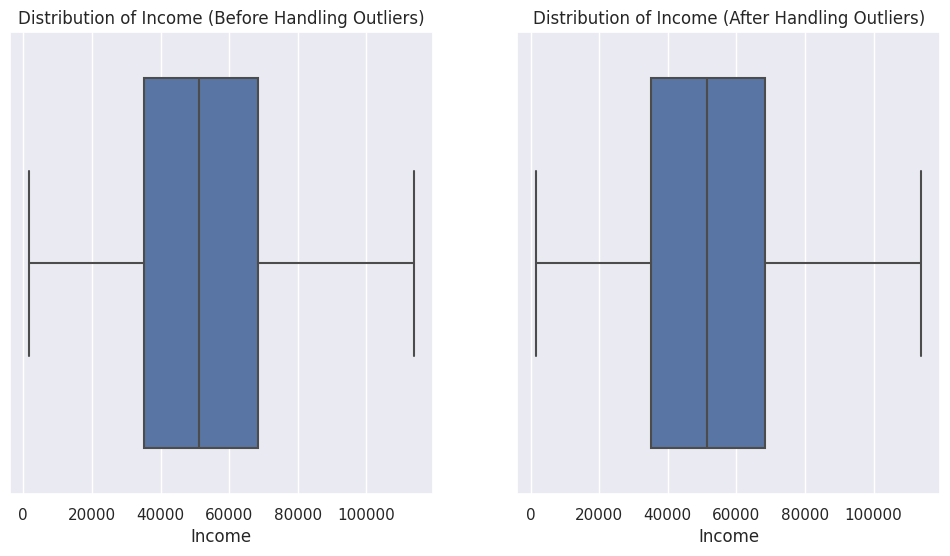

In [67]:
# Visualize the distribution before and after handling outliers
plt.figure(figsize=(12, 6))

# Before handling outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=df[key_variable])
plt.title(f'Distribution of {key_variable} (Before Handling Outliers)')

# After handling outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df[key_variable])
plt.title(f'Distribution of {key_variable} (After Handling Outliers)')

plt.show()

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



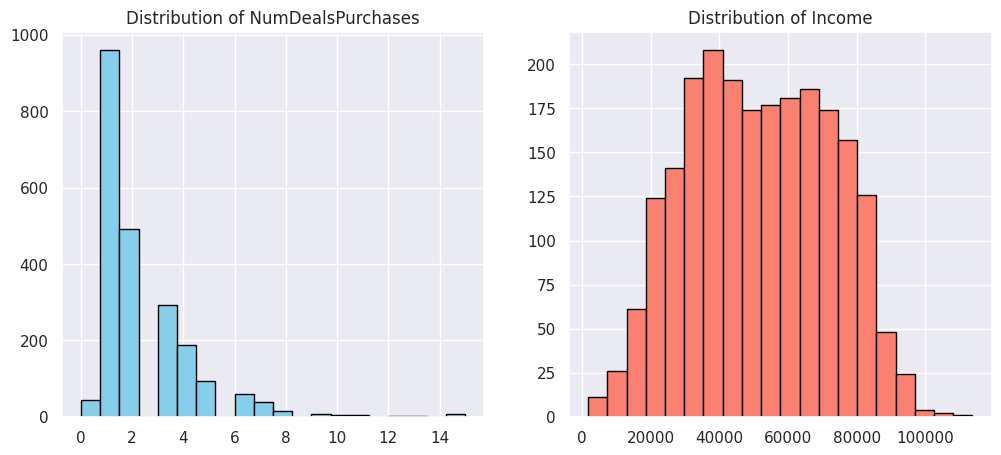


Probability and Expected Value for NumDealsPurchases (Binomial):
Probability of success (p): 0.1549
Expected Value: 343.27

Expected Value for Income (Normal): 51633.64


In [71]:
# Choose relevant variables for analysis
binomial_variable = 'NumDealsPurchases'
normal_variable = 'Income'

# Visualize the distributions
plt.figure(figsize=(12, 5))

# Histogram for NumDealsPurchases
plt.subplot(1, 2, 1)
plt.hist(df[binomial_variable], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {binomial_variable}')

# Histogram for Income
plt.subplot(1, 2, 2)
plt.hist(df[normal_variable], bins=20, color='salmon', edgecolor='black')
plt.title(f'Distribution of {normal_variable}')

plt.show()

# Determine suitable probability distributions
# Based on the visual inspection, 'NumDealsPurchases' may follow a Binomial distribution
# 'Income' may follow a Normal distribution

# Calculate probabilities and expected values
# For Binomial distribution
binomial_p = df[binomial_variable].mean() / df[binomial_variable].max()
binomial_expected_value = df.shape[0] * binomial_p

# For Normal distribution
normal_expected_value = df[normal_variable].mean()

# Display results
print(f"\nProbability and Expected Value for {binomial_variable} (Binomial):")
print(f"Probability of success (p): {binomial_p:.4f}")
print(f"Expected Value: {binomial_expected_value:.2f}")

print(f"\nExpected Value for {normal_variable} (Normal): {normal_expected_value:.2f}")

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

<ipython-input-72-102232dc6ed3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


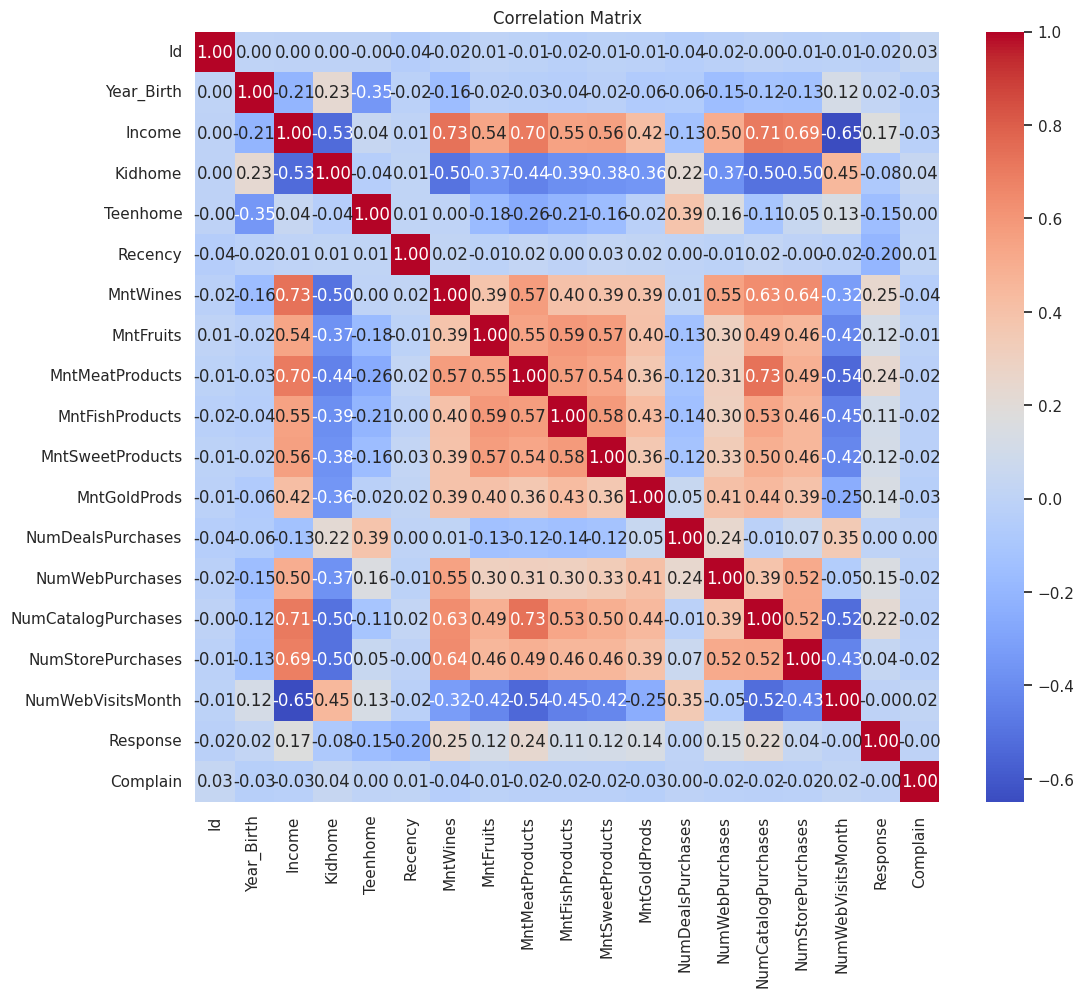

<Figure size 1200x800 with 0 Axes>

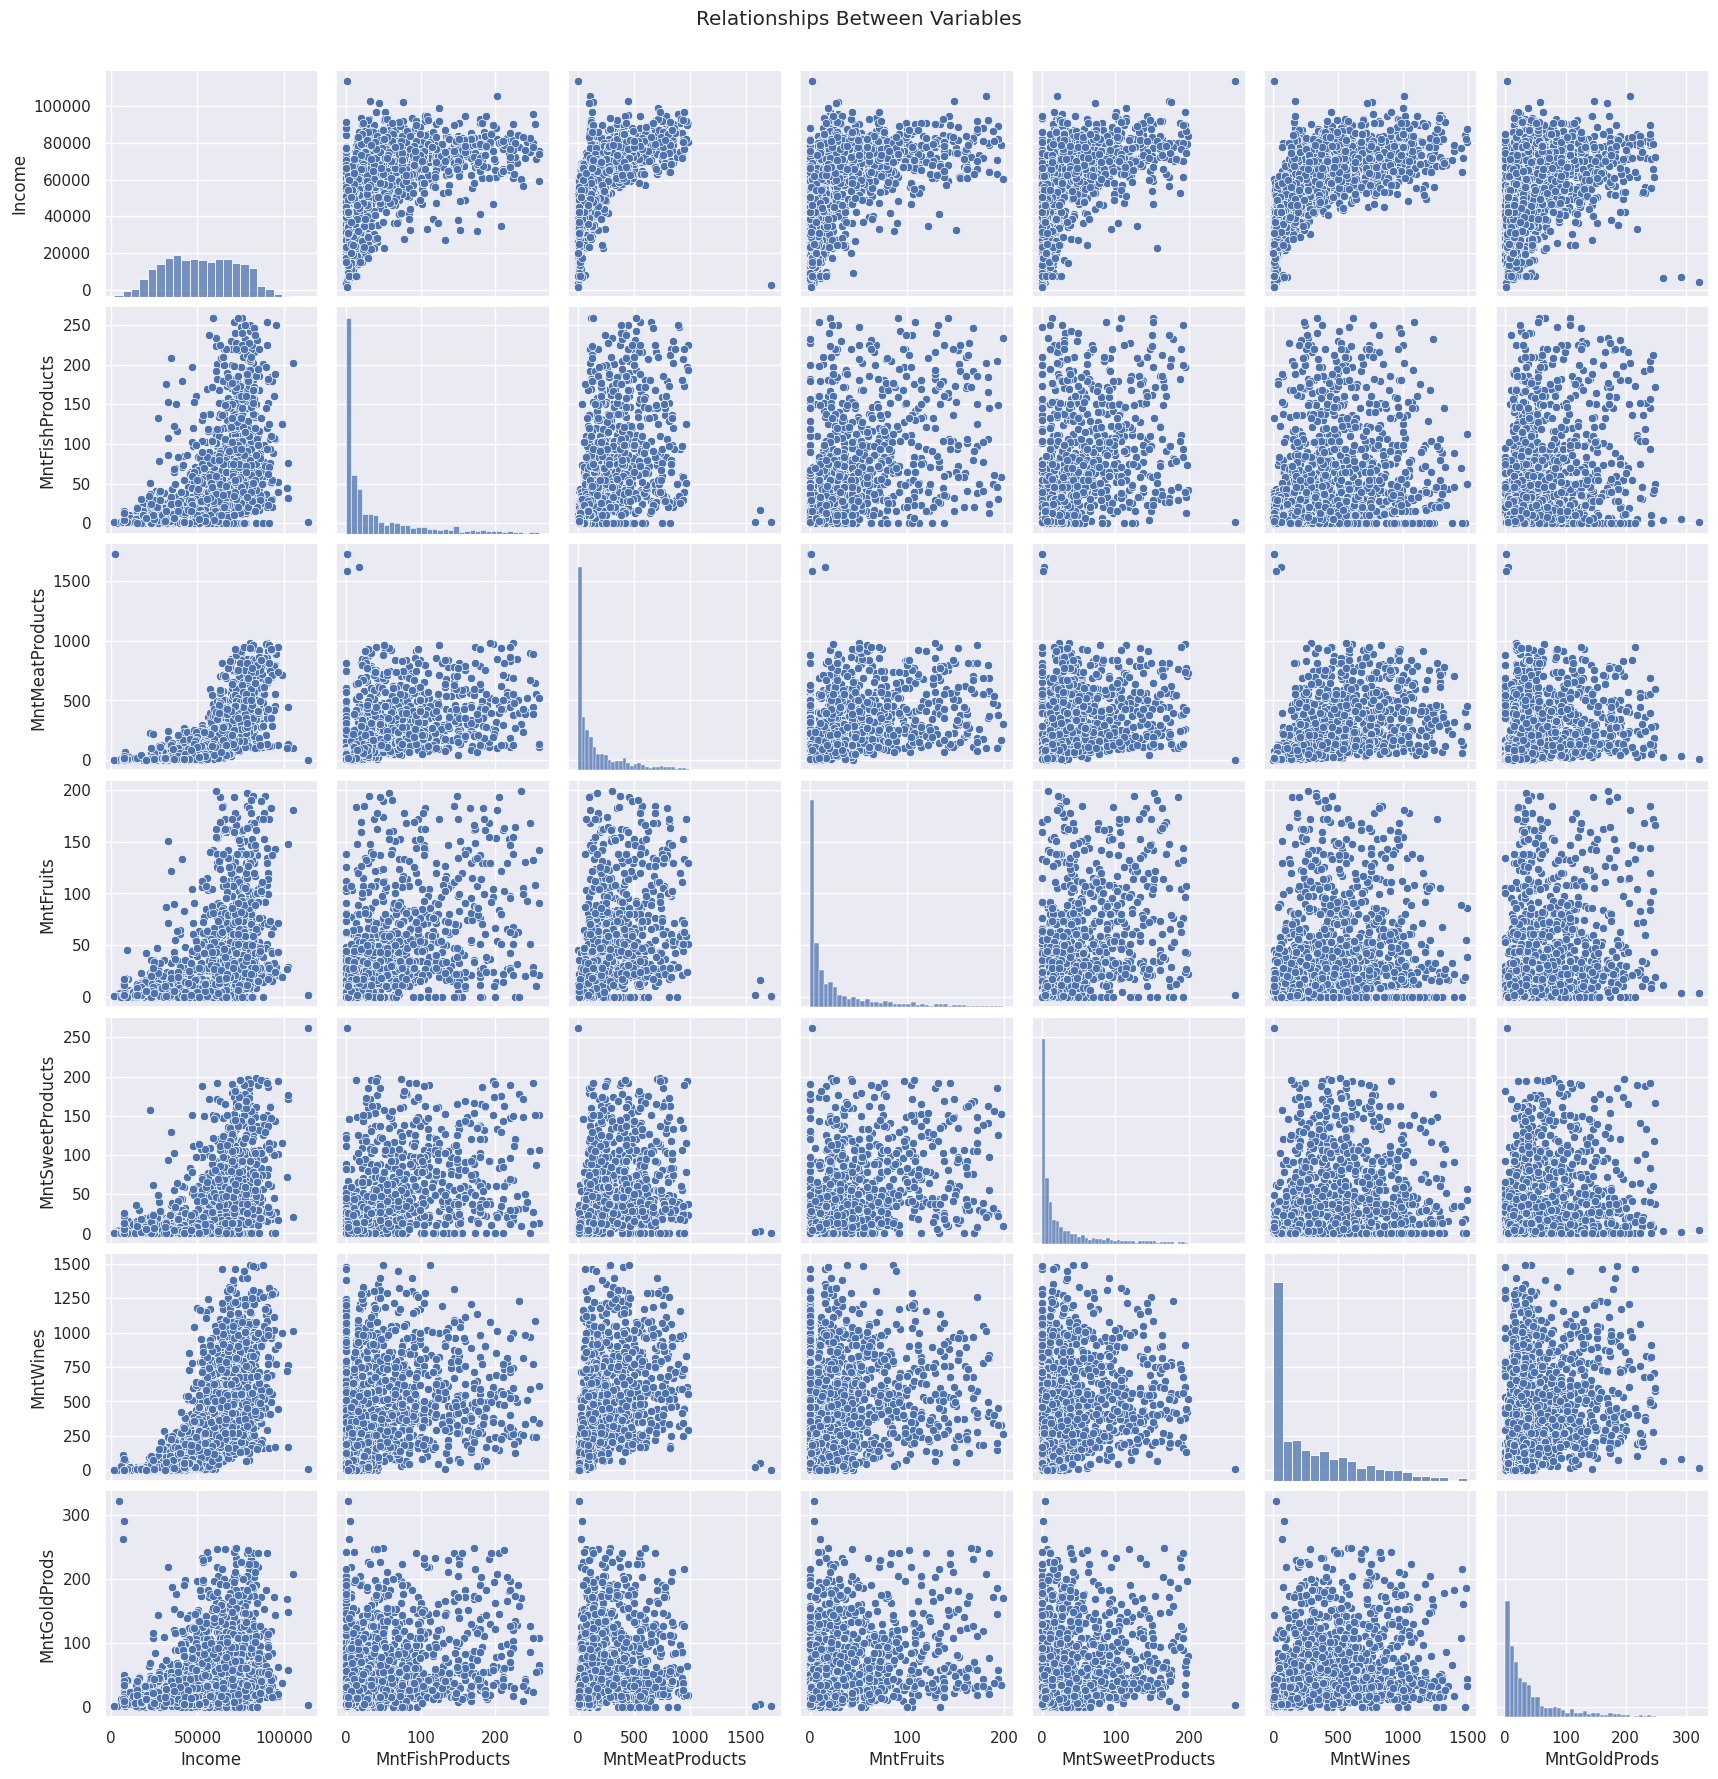

In [72]:
# Correlation Analysis
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Spending Habits Analysis
plt.figure(figsize=(12, 8))
sns.pairplot(df[['Income', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']])
plt.suptitle('Relationships Between Variables', y=1.02)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


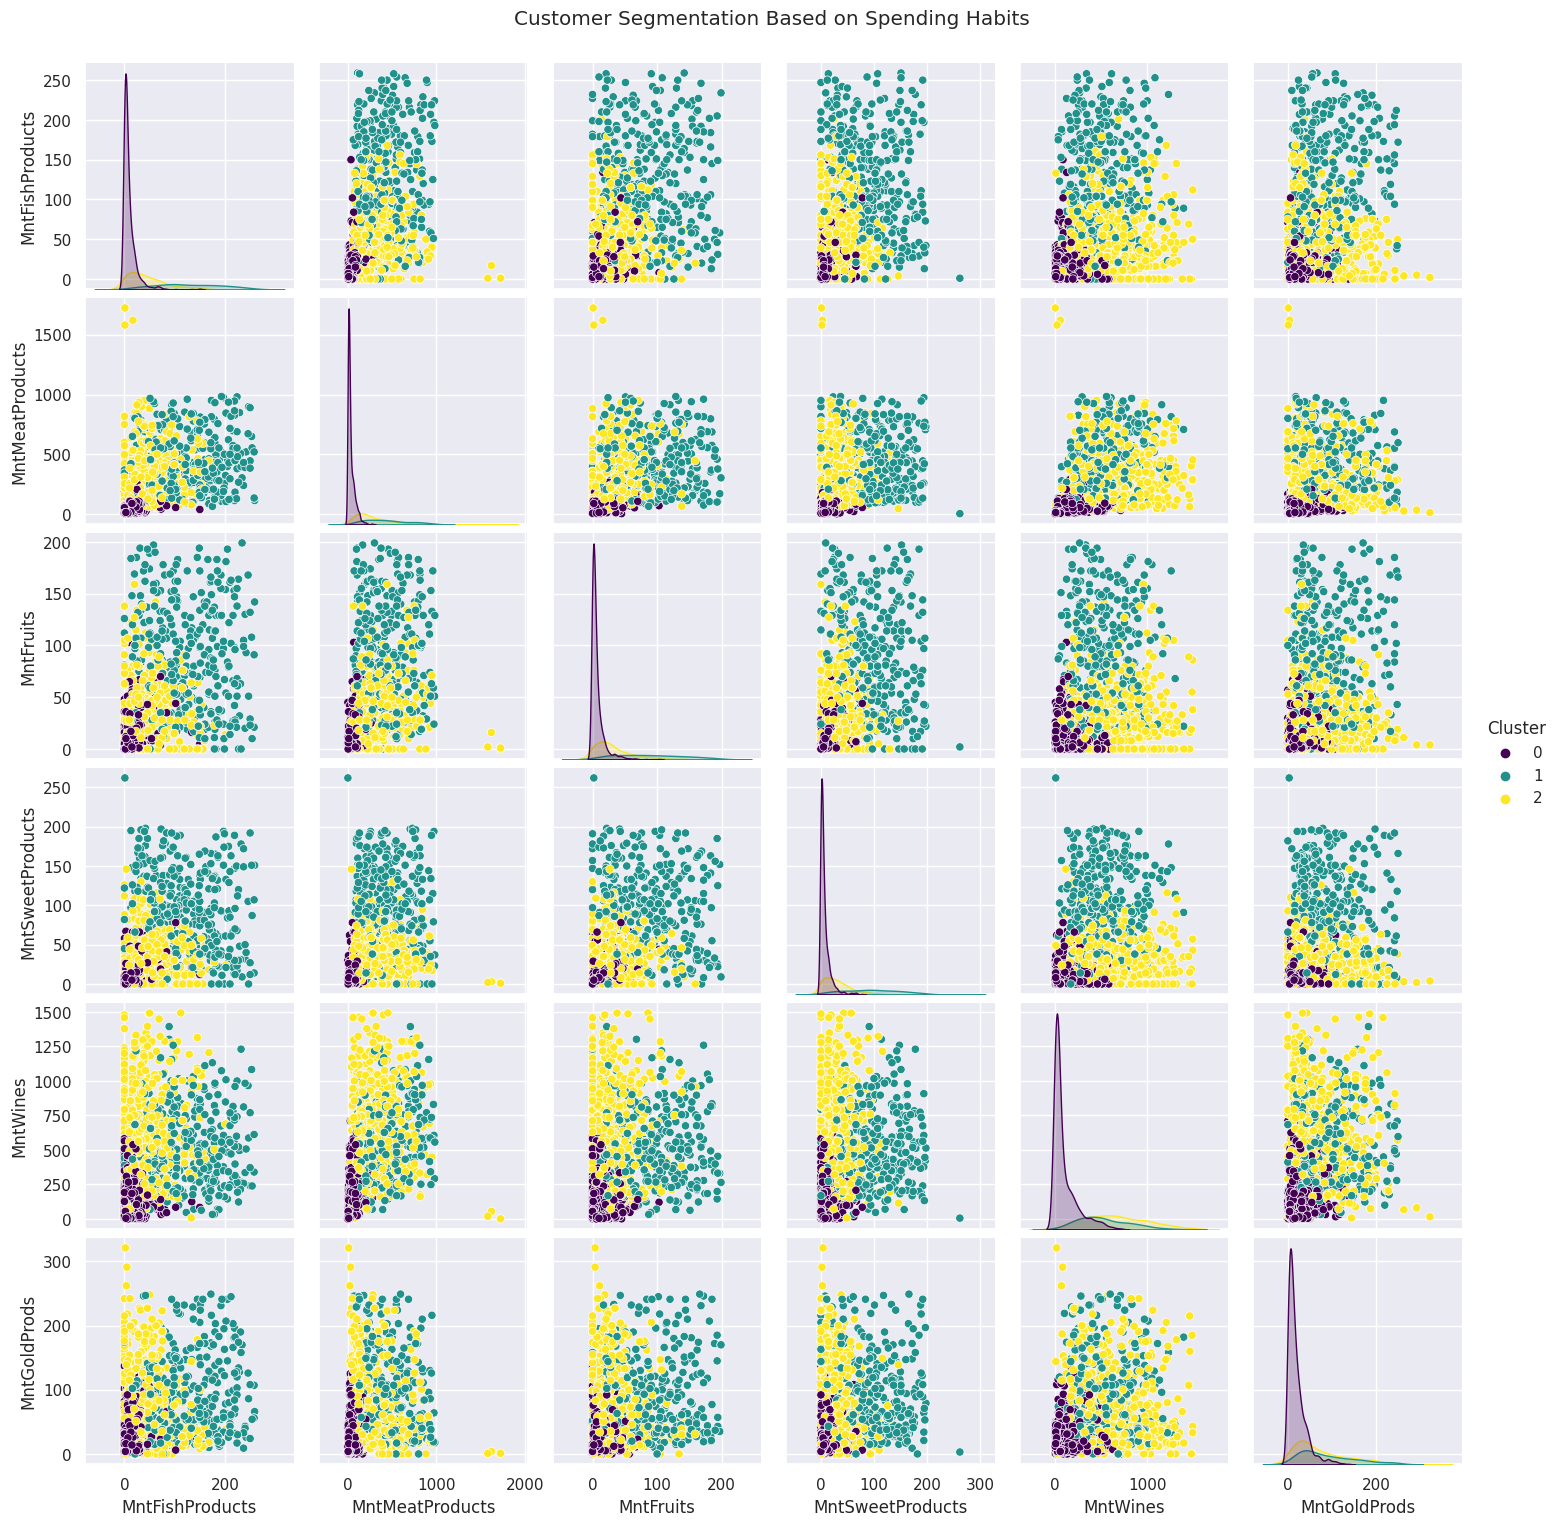

In [73]:
# 2. Customer Segmentation:

# Select relevant features for clustering
features_for_clustering = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features_for_clustering])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters
sns.pairplot(df, hue='Cluster', vars=features_for_clustering, palette='viridis')
plt.suptitle('Customer Segmentation Based on Spending Habits', y=1.02)
plt.show()

In [74]:
# 3. Interpretation and Insights:

# Analyze the characteristics of each cluster
cluster_means = df.groupby('Cluster')[features_for_clustering + ['Income']].mean()
print('\nCluster Means:')
print(cluster_means)

# Explore additional insights based on the characteristics of each cluster
# For example, identify which cluster has higher spending on specific products or higher income.

# Feel free to adapt and extend the analysis based on your specific objectives and dataset characteristics.


Cluster Means:
         MntFishProducts  MntMeatProducts  MntFruits  MntSweetProducts  \
Cluster                                                                  
0               9.067233        35.306801   6.435085          6.414219   
1             127.124324       439.737838  88.227027         94.505405   
2              44.630435       292.885870  31.583333         30.125000   

           MntWines  MntGoldProds        Income  
Cluster                                          
0         94.986090     18.619784  38515.580295  
1        521.016216     88.200000  73970.429730  
2        652.889493     73.730072  67379.655738  


## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

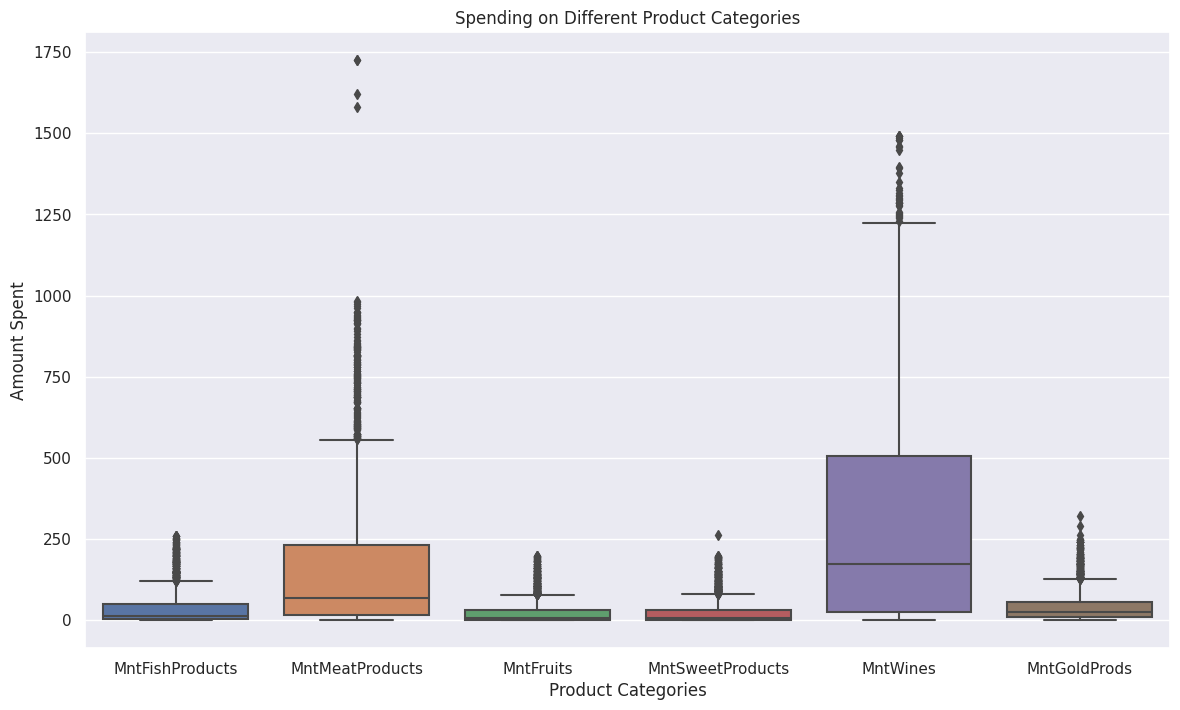

In [75]:
# 1. Spending Habits Analysis:

plt.figure(figsize=(14, 8))

# Spending on different product categories
sns.boxplot(data=df[['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']])
plt.title('Spending on Different Product Categories')
plt.ylabel('Amount Spent')
plt.xlabel('Product Categories')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


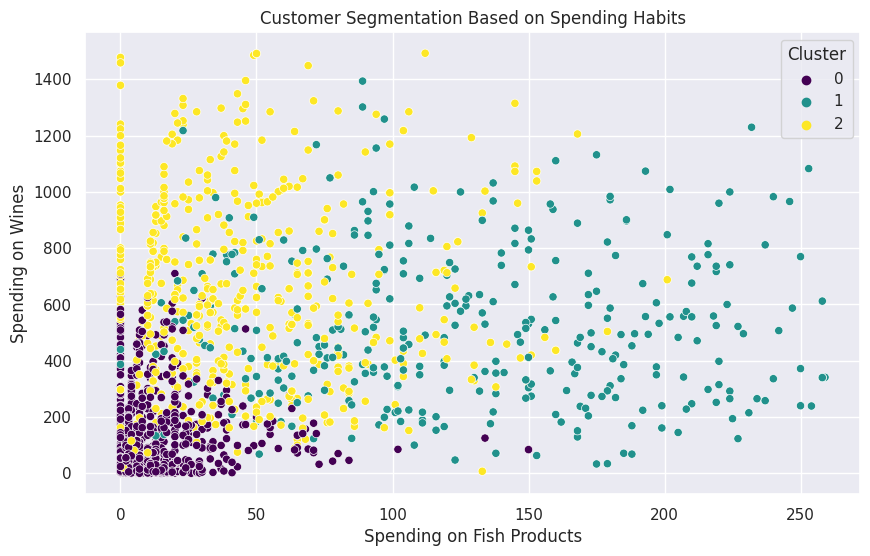

In [76]:
# 2. Customer Segmentation:

# Select relevant features for clustering
features_for_clustering = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features_for_clustering])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MntFishProducts', y='MntWines', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation Based on Spending Habits')
plt.xlabel('Spending on Fish Products')
plt.ylabel('Spending on Wines')
plt.show()

In [77]:
# 3. Recommendations:

# Analyze the characteristics of each cluster
cluster_means = df.groupby('Cluster')[features_for_clustering + ['Income']].mean()

# Identify characteristics of high-spending clusters
high_spending_clusters = cluster_means[cluster_means['MntWines'] > cluster_means['MntWines'].mean()].index

# Recommend targeted marketing strategies for high-spending clusters
for cluster in high_spending_clusters:
    print(f"\nRecommendations for Cluster {cluster}:")
    print(f"1. Offer personalized discounts on high-margin products.")
    print(f"2. Introduce loyalty programs to encourage repeat purchases.")
    print(f"3. Launch targeted advertising campaigns for premium products.")

# Feel free to adapt and extend the analysis and recommendations based on your specific objectives and dataset characteristics.


Recommendations for Cluster 1:
1. Offer personalized discounts on high-margin products.
2. Introduce loyalty programs to encourage repeat purchases.
3. Launch targeted advertising campaigns for premium products.

Recommendations for Cluster 2:
1. Offer personalized discounts on high-margin products.
2. Introduce loyalty programs to encourage repeat purchases.
3. Launch targeted advertising campaigns for premium products.


# **Conclusion**
In conclusion, this project serves as a comprehensive exploration of customer purchase behavior. By applying descriptive statistics and probability theory, we aim to empower the company with valuable insights that can inform strategic decisions and enhance overall marketing effectiveness.

        THANK YOU!